In [20]:
from scipy.io import arff
import numpy as np
from matplotlib import pyplot as plt

In [3]:
filename = '../data/data.arff'

First, we read the arff file:

In [18]:
with open(filename, 'r') as f:
    data, meta = arff.loadarff(f)

print(data[0])
print(meta)

(25., b'Private', 226802., b'11th', 7., b'Never-married', b'Machine-op-inspct', b'Own-child', b'Black', b'Male', 0., 0., 40., b'United-States', b'<=50K')
Dataset: adult
	age's type is numeric
	workclass's type is nominal, range is ('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked')
	fnlwgt's type is numeric
	education's type is nominal, range is ('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool')
	education-num's type is numeric
	marital-status's type is nominal, range is ('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse')
	occupation's type is nominal, range is ('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farmin

Now, we can perform some basic statistics.
For example, what is the distribution of the class attribute?

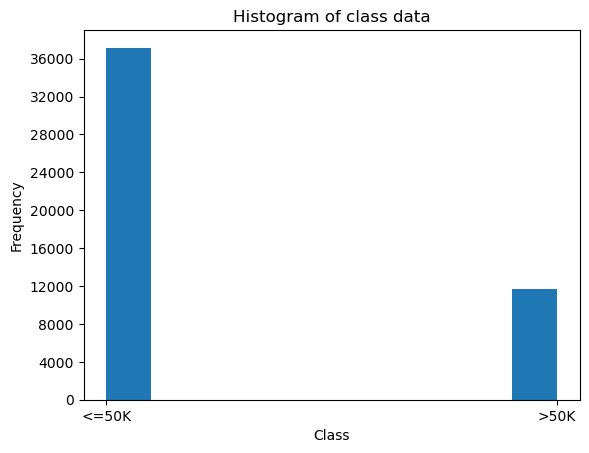

In [26]:
class_data = data['class']

# We can plot a histogram of the class data
plt.hist(class_data)
plt.title('Histogram of class data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

As we can see, it is about 25/75, which is not bad.
We can also see the distribution of different attributes, like the sex, the age and the race:

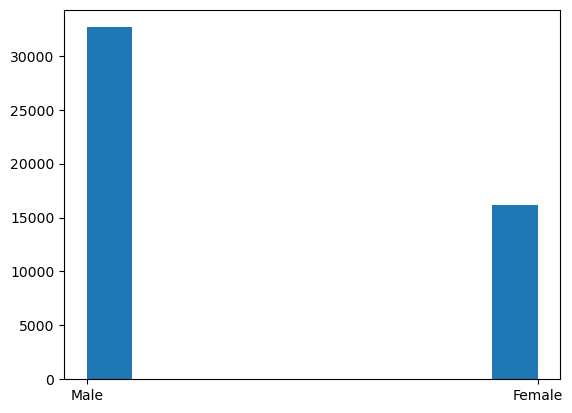

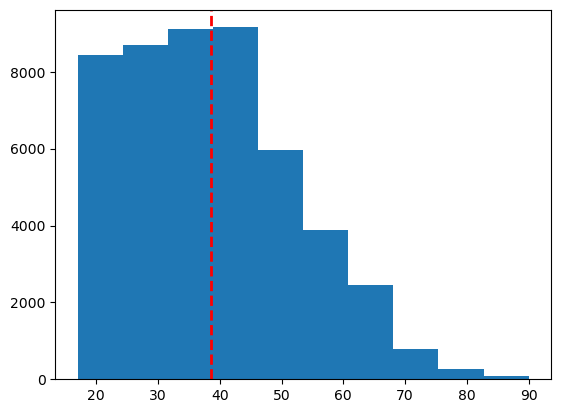

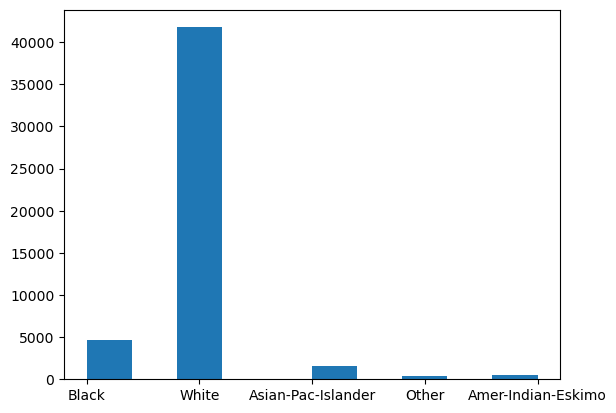

In [31]:
sex = data['sex']
age = data['age']
race = data['race']

# And plot it
plt.hist(sex)
plt.show()

plt.hist(age)
# we plot the average age
plt.axvline(np.mean(age), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.hist(race)
plt.show()

We can see how the dataset is mainly composed of white-males between 20 and 40 years old. Thus, we can see that the dataset is not balanced, and we will have to take this into account when we train our models. This will be an added challenge to the project.

For instance, an initial assessment that we can do is to see how the income is distributed:

Percentage of white people with salary > 50K:  0.2539868780230832
Percentage of black people with salary > 50K:  0.1208110992529349


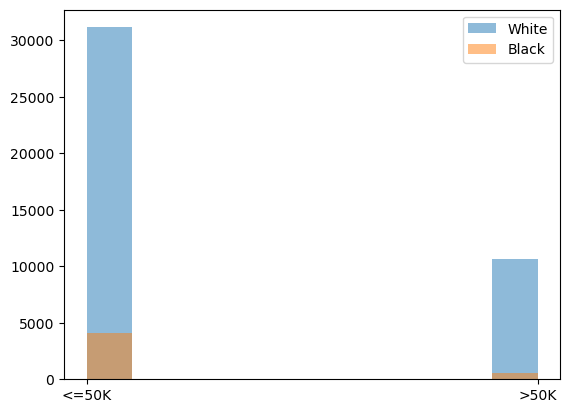

In [36]:
# Let's see how is the salary distribution in white people and black people
white = data[data['race'] == b'White']['class']
black = data[data['race'] == b'Black']['class']

# We can compute the percentage of people with salary > 50K
print('Percentage of white people with salary > 50K: ', np.sum(white == b'>50K') / len(white))
print('Percentage of black people with salary > 50K: ', np.sum(black == b'>50K') / len(black))

# Let's plot both histograms together
plt.hist(white, alpha=0.5, label='White')
plt.hist(black, alpha=0.5, label='Black')
plt.legend(loc='upper right')
plt.show()

This way, we see how there are significant differences between the distribution of the class attribute in each group. This will ultimately affect our models, and we will try to take measures to reduce the bias, assessing the impact of the measures in the results.